In [ ]:
%pip list


# 1. DATA SET - KAGGLE


# 2. Extracting Data


In [2]:
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True,
                       min_detection_confidence=0.3, max_num_hands=2)

DATA_DIR = '.\Indian'
letters = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'J',
    'K',
    'L',
    'M',
    'N',
    'O',
    'P',
    'Q',
    'R',
    'S',
    'T',
    'U',
    'V',
    'W',
    'X',
    'Y',
    'Z',]


In [17]:
# collage
arrImgs = []
probimgs =[]
c =0
for alphabet in os.listdir(DATA_DIR):
    for imgPath in os.listdir(os.path.join(DATA_DIR, alphabet))[:50]:
        img = cv2.imread(os.path.join(DATA_DIR, alphabet, imgPath))
        img = cv2.resize(img, (512, 512))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            d = exrtractData(result)

            draw(img, result)
            cv2.putText(img, alphabet, (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (224, 135, 69),  3,
                        cv2.LINE_AA)
            # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            arrImgs.append(img)
        else:
            probimgs.append(img)
            c+=1
        # plt.figure()
        # plt.imshow(img_rgb)

# plt.show()


In [ ]:
vstackarr = []
for i in range(5):
    hs = np.hstack(arrImgs[i*7:i*7 + 7])
    vstackarr.append(hs)

v = np.vstack(vstackarr)
cv2.imwrite('col.png', v)
cv2.imshow("Final Collage", v)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
print(c)

88


In [ ]:
print(len(arrImgs))
for n, i in enumerate(arrImgs):
    print(len(i))
    cv2.imshow("img", i)
    # cv2.imwrite(str(n)+'.png',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [20]:
cap.release()

In [13]:
a = os.path.join(DATA_DIR, 'S', '0'+'.jpg')

print(a)


.\Indian\S\0.jpg


- os.listdir -> lists all dirs at the specified path
- os.path.join as name suggests path kei liye


In [5]:
def exrtractData(result) -> list:
    dataLeft = []
    dataRight = []
    totalData = []
    for handType, handLms in zip(result.multi_handedness, result.multi_hand_landmarks):
        if handType.classification[0].label == 'Left':
            # print('inLeft')
            for i in range(len(handLms.landmark)):
                x = handLms.landmark[i].x
                y = handLms.landmark[i].y
                dataLeft.append(x)
                dataLeft.append(y)

        else:
            # print("inRight")
            for i in range(len(handLms.landmark)):
                x = handLms.landmark[i].x
                y = handLms.landmark[i].y
                dataRight.append(x)
                dataRight.append(y)

    if len(dataLeft) == 0 and len(dataRight) == 42:
        # i.e empty toh zeros sei bhar do
        # 21x 21 y
        # print('inNoLeft')
        dataLeft = [0]*42
    if len(dataRight) == 0 and len(dataLeft) == 42:
        # print('inNoRight')
        dataRight = [0]*42
    totalData.extend(dataLeft)
    totalData.extend(dataRight)
    return totalData


In [6]:
def draw(img, result):
    for hand_landmarks in result.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            img,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())


### i want Left hand landmarks then right hand landmarks


In [5]:
data = []
labels = []
for alphabet in os.listdir(DATA_DIR):
    for imgPath in os.listdir(os.path.join(DATA_DIR, alphabet)):
        img = cv2.imread(os.path.join(DATA_DIR, alphabet, imgPath))
        # img = cv2.resize(img, (512, 512))
        # as img is in bgr -> mp need rgb so convert
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        totalData = []
        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            totalData = exrtractData(result)
            data.append(totalData)
            labels.append(alphabet)
        # plt.figure()
        # plt.imshow(img_rgb)
    print(alphabet)

# plt.show()


A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [6]:

print(len(data))
for i in letters:
    print(i, labels.count(i))


31585
A 1200
B 1200
C 1345
D 1200
E 1200
F 1200
G 1197
H 1200
I 1379
J 1200
K 1200
L 1200
M 1200
N 1200
O 1376
P 1180
Q 1046
R 1200
S 1175
T 1200
U 1200
V 1287
W 1200
X 1200
Y 1200
Z 1200


In [7]:
import pickle

# py lib to save data and info


we saved the extracted data here cus we just in case something goes wrong in ide we dont have to extract the data again


In [8]:
f = open('data_3.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()


# 3. Training Classifier


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pickle

In [3]:
data_dict = pickle.load(open('./data_3.pickle', 'rb'))


In [4]:

print(len(data_dict['data']))
print(len(data_dict['labels']))


31585
31585


In [5]:

# print(type(data_dict['data'][126]))

t = []
for i in range(len(data_dict['data'])):
   
    if data_dict['labels'][i]=='S':
        data_dict['labels'].pop(i)
        data_dict['data'].pop(i)
print(t)


IndexError: list index out of range

In [6]:
dataset = np.asarray(data_dict['data'])
label = np.asarray(data_dict['labels'])


In [7]:
print(len(dataset))
noOfEach =[]
for i in letters:
    noOfEach.append( data_dict['labels'].count(i))




30997


NameError: name 'letters' is not defined

In [8]:
for a,b in zip(letters,noOfEach):
    print(a,b)

NameError: name 'letters' is not defined

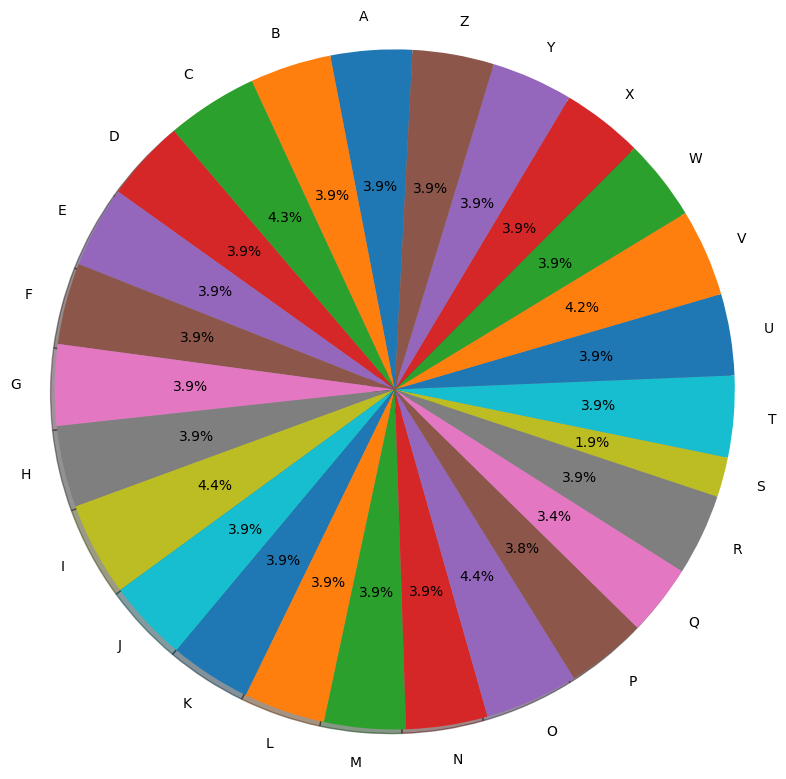

In [60]:
plt.pie(noOfEach,labels=letters, startangle=87,shadow = True,
        radius =2.3, autopct = '%1.1f%%')
# plt.legend()
plt.savefig('dataSetPieChart.png',bbox_inches='tight',pad_inches=0.1)
plt.show()


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    dataset, label, test_size=0.2, random_state=42, stratify=label)


In [82]:
n_estimators = [1, 2, 4, 8, 16,24, 32, 64,80,100,150,200]
res_noBoot=[]
res_boot=[]
# for estimator in n_estimators:
#     rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#     rf.fit(x_train, y_train)
#     y_predict = rf.predict(x_test)
#     score = accuracy_score(y_predict, y_test)
#     res_noBoot.append(score)
print("NOW BOOTSTRAP TRUE")
for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=estimator, n_jobs=-1,bootstrap=True, random_state=42)
    rf.fit(x_train, y_train)
    y_predict = rf.predict(x_test)
    score = accuracy_score(y_predict, y_test)
    res_boot.append(score)


NOW BOOTSTRAP TRUE


In [78]:
for i,j in zip(n_estimators,res_boot):
    print(i,j)

1 0.995
2 0.9961290322580645
4 0.9991935483870967
8 0.9995161290322581
16 0.9996774193548387
24 0.9996774193548387
26 0.9996774193548387
32 0.9995161290322581
64 0.9995161290322581
69 0.9996774193548387
80 0.9998387096774194
100 0.9996774193548387
200 0.9998387096774194


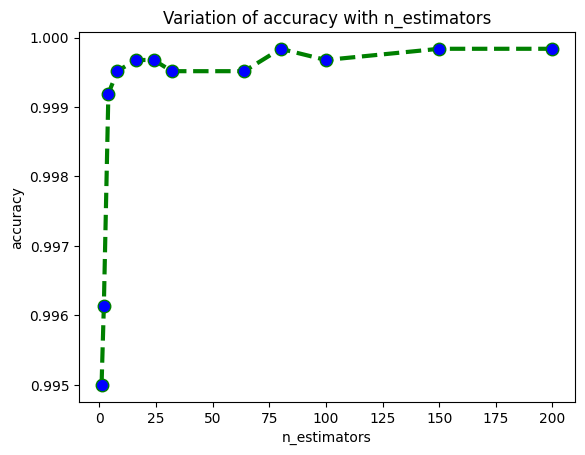

In [87]:
# plt.plot(n_estimators,res_noBoot,label ='w/o bootstrap')
plt.plot(n_estimators, res_boot, label='with bootstrap', color='green', linestyle='dashed', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=9)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
# plt.xlim(0, 50)
# plt.ylim(0.6,1)
plt.title('Variation of accuracy with n_estimators')
# plt.legend()
plt.savefig('Variation_of_accuracy_with_n_estimators.png',bbox_inches='tight',pad_inches=0.1)
plt.show()


In [82]:
n_estimators = [16,17,18,20,22,25,26]
for estimator in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=estimator, n_jobs=-1, bootstrap=True, random_state=42)
    rf.fit(x_train, y_train)
    y_predict = rf.predict(x_test)
    score = accuracy_score(y_predict, y_test)
    print(score, estimator)

0.9998355804011838 16
0.9998355804011838 17
0.9998355804011838 18
0.9998355804011838 20
0.9998355804011838 22
0.9998355804011838 25
0.9998355804011838 26


# WE CAN THERFORE CONFIRM THAT 26 TREES IS BETTER AS AFTER THAT WE MIGHT BE OVERFITING

In [10]:
model = RandomForestClassifier(random_state=42, n_estimators=8,bootstrap=True,n_jobs=-1)

# model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=8, n_jobs=-1, random_state=42)

In [11]:
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)
print(score)
# 0.9997576932396414


0.9995161290322581


In [ ]:
# model.feature_importances_
model.__dict__



In [12]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           A       1.00      1.00      1.00       240
           B       1.00      1.00      1.00       240
           C       1.00      1.00      1.00       269
           D       1.00      1.00      1.00       240
           E       1.00      1.00      1.00       240
           F       1.00      1.00      1.00       240
           G       1.00      1.00      1.00       240
           H       1.00      1.00      1.00       240
           I       1.00      1.00      1.00       276
           J       1.00      1.00      1.00       240
           K       1.00      1.00      1.00       240
           L       1.00      1.00      1.00       240
           M       1.00      1.00      1.00       240
           N       1.00      1.00      1.00       240
           O       1.00      1.00      1.00       275
           P       1.00      1.00      1.00       236
           Q       1.00      1.00      1.00       209
           R       1.00    

In [20]:
q = open('model_4.p', 'wb')
pickle.dump({'model_4': model}, q)
q.close()


In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn = KNeighborsClassifier(n_neighbors=50)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)
print(score)

0.9998355804011838


# 4. TESTING CLASSIFIER


In [23]:
import pickle
import cv2

In [24]:
model_dict = pickle.load(open('./model_3.p', 'rb'))
model = model_dict['model_3']


In [25]:
model.__dict__

{'estimator': DecisionTreeClassifier(),
 'n_estimators': 16,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': -1,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'n_features_in_': 84,
 'n_outputs_': 1,
 'classes_': array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype='<U1'),
 'n_classes_': 25,
 '_estimator': DecisionTreeClassifier(),
 'estimators_': [Decis

In [22]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    result = hands.process(frame_rgb)
    if result.multi_hand_landmarks:
        draw(frame, result)
        frameData = exrtractData(result)
        # print(len(frameData))

        pred = model.predict([np.asarray(frameData)])
        cv2.putText(frame, pred[0], (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                    cv2.LINE_AA)

    # Show to screen
    cv2.imshow('OpenCV Feed', frame)
    referenceImg = cv2.imread('col.png')
    cv2.imshow('Reference', referenceImg)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


In [21]:
cap.release()

cv2.destroyAllWindows()
